# COGS 108 - Final Project 

# Overview

This project verified the consistency of inspectors on two levels: mean/median score and violation emphasis between inspectors. We found that with a standard deviation around 1.1, inspector scores remained very consistent between inspectors although the small number of inspectors involved in the dataset could affect accuracies. In addition, there was some variation in violation emphasis between inspectors as 4/30 seemed to emphasize some critical questions more than other inspectors.

# Name & PID

- Name: Aaron Broukhim
- PID: A92123728

# Research Question

Is the standard deviation of mean and median scores of restuarant inspectors more than 10? Do different inspectors emphasize some violations at a rate higher than 5% from the average?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1) My parents owned a restaurant for 20 years that recently closed down. I asked them if they had any complaints about their experiences with the inspectors and they expressed concern with the inconcistency of the inspectors & the lack inspections in general due to budget cuts. They explained that you are assigned a new inspector each year and if that inspector is more strict than others it could result in the restaurant closing down in extreme cases. One bad inspector could end a restaurant since they only rotate once a year and it takes two <70 scres to close a restaurant. When a new inspector was assigned they didn'd know what to expect becuase each inspector seemed to have a different agenda than the last. Consistency seems very important when it could affect how a person/family earns their income so its important that the city ensures their inspectors are all on the same page. Another solution could be to rotate the inspectors more frequently. 
- 2)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3323064/ in tennessee the mean inspection of individual inspectors was between 69 and 92. We also see a jump from 69 and 70 indicating that inspectors dont like to give below a 70 to restaurants. 
- 3) https://www.foodandwine.com/news/restaurant-health-inspections-time-day-study there also has been reporting that time of day has an impact on the score a restauarant recieves. My parents mentioned that some inspectors comes during rush hour which has a much more likely chance of viiolations than on a slower day. 

# Hypothesis


Ideally we would get a standard deviation less than 10. That would inidicate that there is a 20 point spread within 68% of our scores. 20 points could be the difference between a restaurant being shutdown or remaining open so it is very important that the inspector assigned to a restaurant does not play a substantial role in the score a restuarant receives. If the standard deviation is greater than 10 then health inspectors need to be trained to standardize their procedures to be more consistent with one another. We also expect there to be less than a 5% difference for most questions when compared to the average distribution. 

# Dataset(s)

- Dataset Name: inspections.csv
- Link to the dataset: https://drive.google.com/file/d/1q20SL4wTsXY5P5WqzL4moYHyfLUTnKdG/view?usp=sharing
- Number of observations: 18467

1-2 sentences describing dataset:
We'll be using this data set for two columns, 'inspectedby' and 'score'. This enables use to link together scores with inspectors to get the average score given per inspector. 

- Dataset Name: violations.csv
- Link to the dataset: https://drive.google.com/file/d/1RMpKp7tvwUWFPMLmIDA8guHDOsnUz1W0/view?usp=sharing
- Number of observations: 189803

1-2 sentences describing dataset:
We'l be using this dataset for two columns, 'inspectedby' and 'questionno'. This enables us to see if any inspectors emphasized certain violations more than others. 

Add 1-2 sentences about how you plan to combine these datasets:
inspections.csv will be helpful in determining the consistency of scores given and violations.csv will be useful in breaking down the violation distribution by inspector. Both datasets contribute to helping ensure that inspections are consistent. 

# Setup

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import os

df1 = pd.read_csv('inspections.csv')
df2 = pd.read_csv('violations.csv')

# Data Cleaning

Describe your data cleaning steps here.

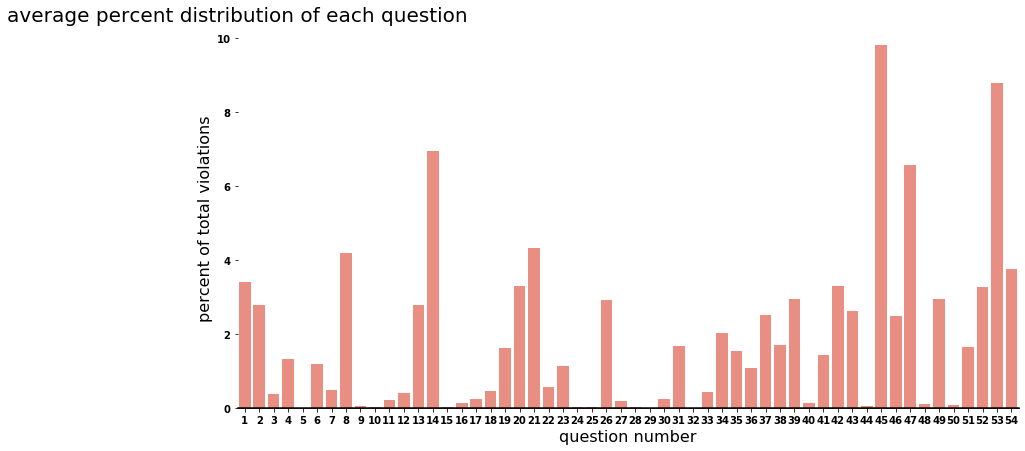

In [258]:
#import inspectors and the scores they've given
#check how many unique values and address any unexpected values
#notice nan value that still needs to be considered, set to noname
#check that we have desired outcome
#check scores column and repeat above steps
df1 = df1[['inspectedby', 'score']]
df1['inspectedby'].unique()
df1 = df1.replace(np.nan, 'noname', regex=True)
df1['inspectedby'].unique()
df1['score'].unique()

#import inspectors and violation codes theyve reported
#check for any unexpected inputs, repeat above steps if unexpected
#remove system activity
df2 = df2[['inspectedby', 'questionno']]
df2['inspectedby'].unique()
df2 = df2.replace(np.nan, 'noname', regex=True)
df2 = df2[df2['inspectedby'] != 'System Activity']
df2['inspectedby'].unique()

#check questionno column
df2['questionno'].unique()

#reformat questionno and inspectedby of df2 to be more usable
total = df2.questionno.count()
df = df2
for x in range(1,55):
        df.loc[x, 'percent'] = df2.questionno[df2['questionno']==x].count()/total*100
df = df.drop(0)
df = df[:54]
del df['inspectedby']
df['questionno'] = df.index
df = df.rename(columns={'questionno':'question number'})
#now we have the percent makeup of each question

#plot df
f, (ax1) = plt.subplots(1, 1, figsize=(14, 7), sharex=True)
x = df['question number']
y1 = df.percent
sns.barplot(x=x, y=y1, color='salmon', ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("percent of total violations", fontsize=16)
ax1.set_xlabel("question number", fontsize=16)
plt.title('average percent distribution of each question', x=0, fontsize=20)

sns.despine(left=True)
#we will look for inspectors who stray too far from that average

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

standard deviation of mean: 
1.1077553719018087
standard deviation of median: 
1.1595283732566


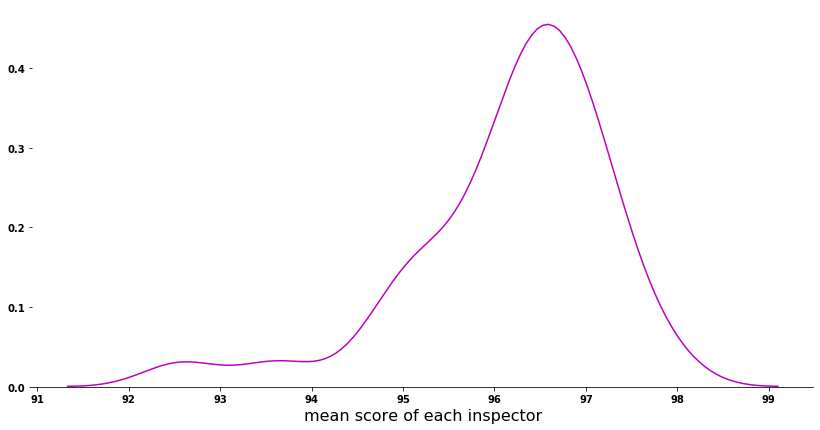

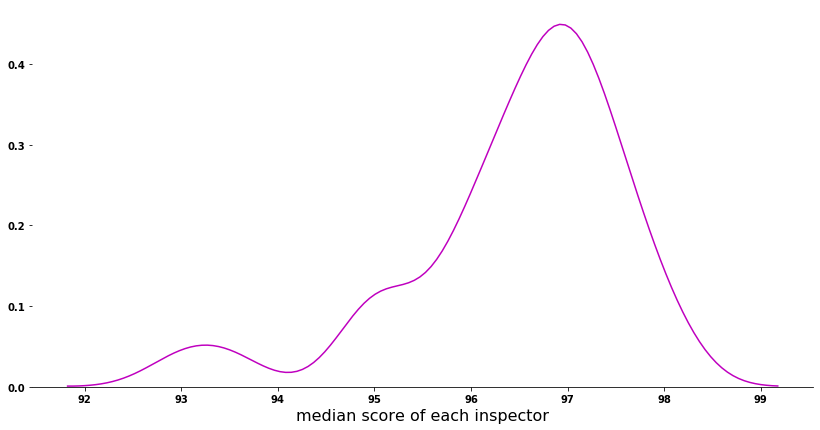

In [259]:
#get standard deviation of mean and median
df3 = df1.groupby('inspectedby').mean()
df4 = df1.groupby('inspectedby').median()
standardMean = df3['score'].std()
standardMedian = df4['score'].std()

#TODO:
#plot df3
f, (ax2) = plt.subplots(1, 1, figsize=(14, 7), sharex=True)
sns.despine(left=True)
d=df3.score
sns.distplot(d, color="m",hist=False, ax=ax2)
ax2.set_xlabel("mean score of each inspector", fontsize=16)

#plot df4
f, (ax3) = plt.subplots(1, 1, figsize=(14, 7), sharex=True)
sns.despine(left=True)
d=df4.score
sns.distplot(d, color="m",hist=False, ax=ax3)
ax3.set_xlabel("median score of each inspector", fontsize=16)
print('standard deviation of mean: ')
print(standardMean)
print('standard deviation of median: ')
print(standardMedian)
#with the standard deviation around 1.1 for both mean and median
#it would seem that inspectors do a great job at maintaining consistent
#scoring when compared to their peers

In [260]:
#get each inspectors percentage of questionno reported to total
#compare it to the average df['percent']
#remove noname, make dataframe with names to questionno to consider
df2 = df2[df2['inspectedby'] != 'noname']
names = df2['inspectedby'].unique()
df5 = pd.DataFrame(columns=names)
df5 = df5.reindex(index=range(1,55))
df5 = df5.fillna(0.0)

#populate dataframe with inspectors and their percentage of each violation used
for name in names:
    total = df2.inspectedby[df2['inspectedby']==name].count()
    for num in range(1,55):
        counter = df2.questionno[(df2.inspectedby==name) & (df2.questionno==num)].count()
        df5.loc[num,name] = ((counter/total)*100)

#rename columns to hide inspector names
i = 1
for column in df5:
    df5 = df5.rename(columns={column:'inspector'+str(i)})
    i += 1

Text(0, 1.0, 'question 1 percent distribution')

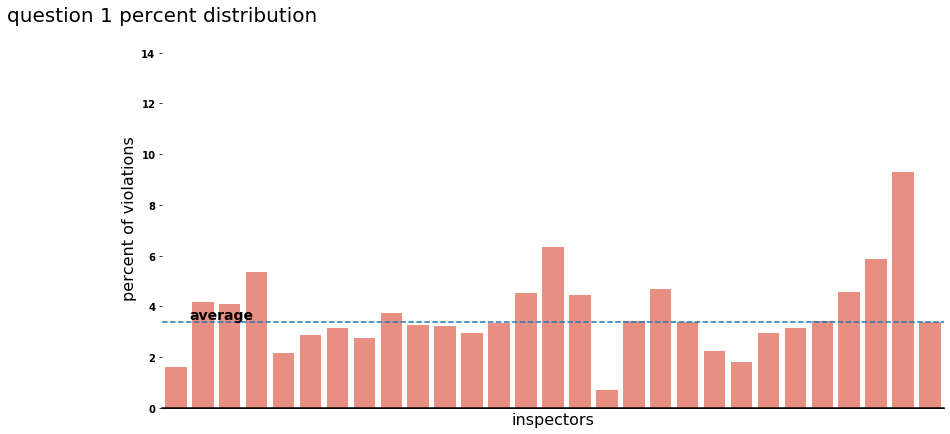

In [261]:
#graph df5 question 1
df5 = df5.drop(columns=['inspector29', 'inspector31'])
df5 = df5.rename(columns={'inspector30':'inspector29'})

f, (ax4) = plt.subplots(1, 1, figsize=(14, 7), sharex=True)

y1 = df5.T[1]
x = y1.index
sns.barplot(x=x, y=y1, color='salmon', ax=ax4).set_title('question1')

average = df.percent[df['question number']==1]
average = average.tolist()
avg = average[0]
ax4.axhline(avg, ls='--')
ax4.text(0.5,avg+.1, "average", fontsize=14)

ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("percent of violations", fontsize=16)
ax4.set_xlabel("inspectors", fontsize=16)
ax4.set(ylim=(0, 15))
ax4.set_xticks([])
sns.despine(left=True)
plt.title('question 1 percent distribution', x=0, fontsize=20)
#question1 has some inspectors who stray from the average by more than 5%

Text(0, 1.0, 'question 14 percent distribution')

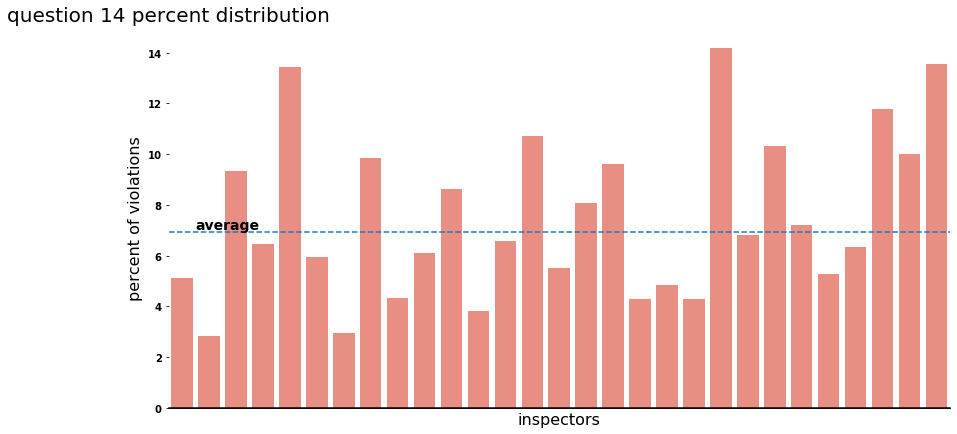

In [262]:
#graph df5 question 14
f, (ax5) = plt.subplots(1, 1, figsize=(14, 7), sharex=True)

y1 = df5.T[14]
x = y1.index
sns.barplot(x=x, y=y1, color='salmon', ax=ax5).set_title('question14')

average = df.percent[df['question number']==14]
average = average.tolist()
avg = average[0]
ax5.axhline(avg, ls='--')
ax5.text(0.5,avg+.1, "average", fontsize=14)

ax5.axhline(0, color="k", clip_on=False)
ax5.set_ylabel("percent of violations", fontsize=16)
ax5.set_xlabel("inspectors", fontsize=16)
ax5.set(ylim=(0, 15))
ax5.set_xticks([])
sns.despine(left=True)
plt.title('question 14 percent distribution', x=0, fontsize=20)
#question14 has some inspectors who stray from the average by more than 5%

In [263]:
#now we have df which has the average percentage of each question
#and df5 which has each inspectors percentage of each question reported
#lets compare the differences
df6 = df5
for column in df5:
    df6[column] = df5[column]-df['percent']
df6[abs(df6)>5].count()
difference = df6[abs(df6)>5].count().sum()
print('number differences off by more than 5%:')
print(difference)

#there was a difference of 5 from the average for 17 inspectors' questions
#out of 30 inspectors. most inespectors had 0 over 5 differences and the max
# was 2. So at most an inspector may check 2 questions more/less than is typical.
#with each question being worth around 1-4 points each and with questions number 1-23 
#being critical risk factors. lets see how many were critical.
df7 = df6[:23]
difference2 = df7[abs(df6)>5].count().sum()
print('number that were critical questions:')
print(df7[abs(df7)>5].count().sum())

#see which questions have differences greater than 5% to plot
#df6[abs(df6)>5]
#14, 47, 53, 45, 14, 45, 53, 1, 14, 45, 52, 53
#14 and 1 are the critical questions with variation
#plot 14 & 1 are above

number differences off by more than 5%:
17
number that were critical questions:
4


# Ethics & Privacy

Looking at our data, what was imported was "inspectedby", "questionno", and "score". We only took the data we needed to help protect businesses and inspecors associated with the study. Minimizing the variables used would help prevent any accidental data leaks. In addition, the names of inspectors were removed from the dataframe to keep them anonymous and protect their privacy. Scores were only released in the form of a standard deviation that would be impossiible to trace back to inspectors. Question numbers were also fairly safe as they were only released those that deviated from the typical under an anonymous name. I feel confident that it would be impossible to trace back to any inspectors names with the given data. No indication of location or identity were included in the final published data. Only taking the data needed proved to make it very easy to prevent anyone from being able to traceback to find the identities of the businesses or inspectors. 

# Conclusion & Discussion

A standard deviation around 1.1 for both the mean and median indicates a very strong consistency among the inspectors involved. I do feel as though the smaller dataset could result in some inaccuracies and would like to test this on a larger dataset. In addition, the average scores tended to be very high, in the 90s, which makes me believe that maybe this research was voluntary and only inspectors who regularly gave good scores would be willing to contribute to the dataset. Other than those skepticisms, it seems like the inspectors maintained a standard deviation in which 68% of scores were with +-1.1 percentage points from one another which is truly remarkable. 

Dataframe df contained the percent distrubution of each violation out of the total violations reported. This gave us an idea of how frequent some violations were reported compared to others. The dataset for this was significantly large, giving greater confidence in the accuracy of this study. Knowing that the standard deviation is fairly small we can do a comparison on the percentage each violation madeup of all total violations reported by each inspector. We could compare frequencies of the average to each respective inspector. Comparing the percentage points by getting the absolute value of the difference between the average and each inspectors percentages showed us that there was some variance there. Ignoring inspector31 who had a small dataset that skewed their results, we noticed that 4 inspectors had a difference greater than 5% from the average for critical questions. This indicates that of the violations reported, these inspectors were reporting these certain violations more frequently than other violations when compared to the average. 

While this won't effect many businesses drastically, it would indicated that 4/30 inspectors will focus on certain critical questions more than their peers. Those 4/30 can lead to some businesses to feel as if there is incosistencies as a critical question requires immediate correction and can be demoralizing. People tend to have a self-serving bias that pushes blame on, in this situation, the inspectors. Based on the results observed it would seem that inspectors are consistent when it comes to scoring and mostly consistent in the variability of question emphasis from different inspectors. 